<a href="https://colab.research.google.com/github/ad1tyasg/Heart-Disease-Prediction-Model/blob/main/ML_PBL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Data Dictionary
# age: Displays the age of the individual.
# sex: Displays the gender of the individual using the following format : 1 = male 0 = female
# cp- Chest-pain type: displays the type of chest-pain experienced by the individual using the following format :
#     0 = typical angina
#     1 = atypical angina
#     2 = non — anginal pain
#     3 = asymptotic
# trestbps- Resting Blood Pressure: displays the resting blood pressure value of an individual in mmHg (unit).
#           anything above 130-140 is typically cause for concern.
# chol- Serum Cholestrol: displays the serum cholesterol in mg/dl (unit)
# fbs- Fasting Blood Sugar: compares the fasting blood sugar value of an individual with 120mg/dl.
#      If fasting blood sugar > 120mg/dl then : 1 (true) else : 0 (false) '>126' mg/dL signals diabetes
# restecg- Resting ECG : displays resting electrocardiographic results
#     0 = normal
#     1 = having ST-T wave abnormality
#     2 = left ventricular hyperthrophy
# thalach- Max heart rate achieved : displays the max heart rate achieved by an individual.
# exang- Exercise induced angina : 1 = yes 0 = no
# oldpeak- ST depression induced by exercise relative to rest: displays the value which is an integer or float.
# slope- Slope of the peak exercise ST segment :
#     0 = upsloping: better heart rate with excercise (uncommon)
#     1 = flat: minimal change (typical healthy heart)
#     2 = downsloping: signs of unhealthy heart
# ca- Number of major vessels (0–3) colored by flourosopy : displays the value as integer or float.
# thal : Displays the thalassemia : 1,3 = normal 6 = fixed defect 7 = reversible defect: no proper blood movement when excercising
# target : Displays whether the individual is suffering from heart disease or not : 1 = yes 0 = no

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import accuracy_score, classification_report

df = pd.read_csv("heart disease classification dataset.csv")
df.shape
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [ ]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
288,63,0,0,124,197,0,1,136,1,0.0,1,0,2,no
289,57,0,0,140,241,0,1,123,1,0.2,1,0,3,no
290,45,1,3,110,264,0,1,132,0,1.2,1,0,3,no
291,68,1,0,144,193,1,1,141,0,3.4,1,2,3,no
292,57,0,1,130,236,0,0,174,0,0.0,1,1,2,no


In [ ]:
df["target"].value_counts()

yes    160
no     133
Name: target, dtype: int64

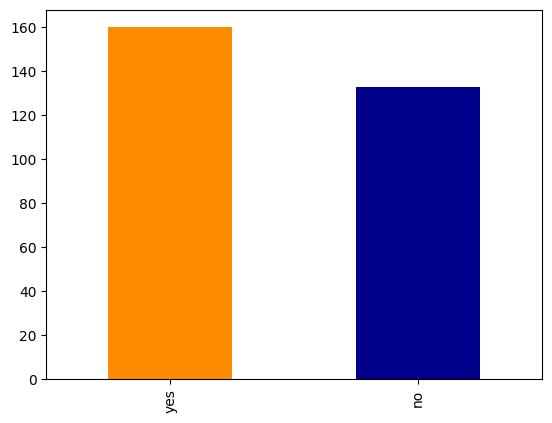

In [ ]:
df["target"].value_counts().plot(kind="bar", color=["darkorange", "darkblue"]);#This shows us the visualization of the target values

In [ ]:
pd.crosstab(df.target, df.sex)

sex,0,1
target,,
no,23,110
yes,68,92


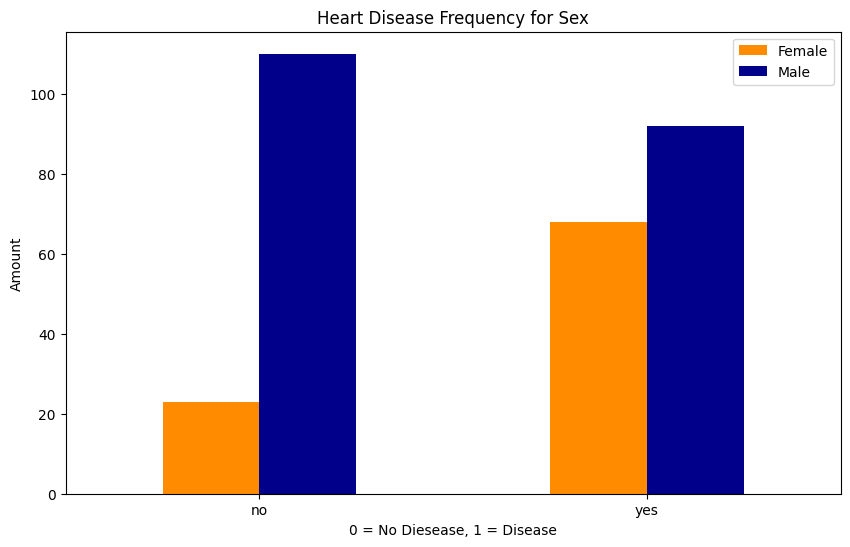

In [ ]:
pd.crosstab(df.target, df.sex).plot(kind="bar",
                                    figsize=(10, 6),
                                    color=["darkorange", "darkblue"])

plt.title("Heart Disease Frequency for Sex")
plt.xlabel("0 = No Diesease, 1 = Disease")
plt.ylabel("Amount")
plt.legend(["Female", "Male"]);
plt.xticks(rotation=0);

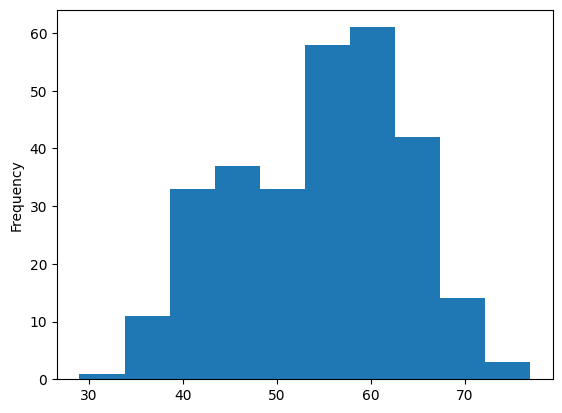

In [ ]:
# Check the distribution of the age column with a histogram
df.age.plot.hist();

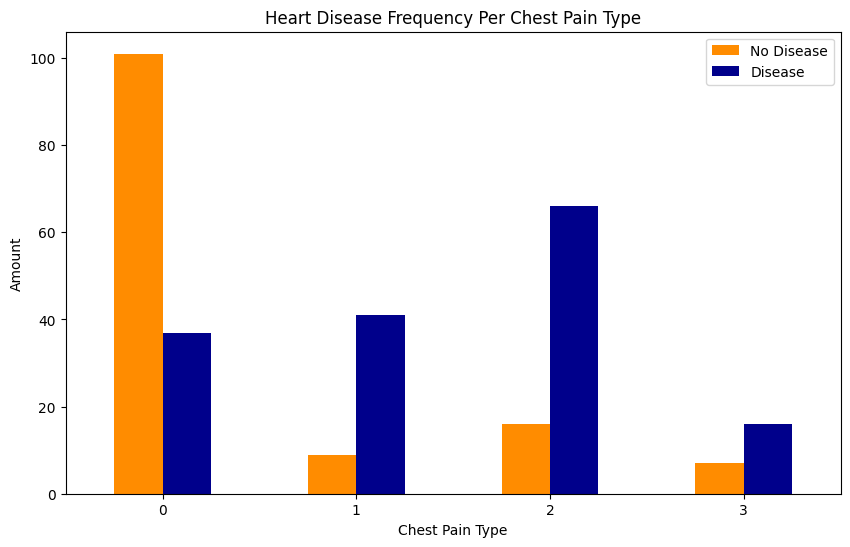

In [ ]:
pd.crosstab(df.cp, df.target).plot(kind="bar",
                                   figsize=(10, 6),
                                   color=["darkorange", "darkblue"])

plt.title("Heart Disease Frequency Per Chest Pain Type")
plt.xlabel("Chest Pain Type")
plt.ylabel("Amount")
plt.legend(["No Disease", "Disease"])
plt.xticks(rotation=0);

<ipython-input-59-8a324467b39f>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


(13.5, -0.5)

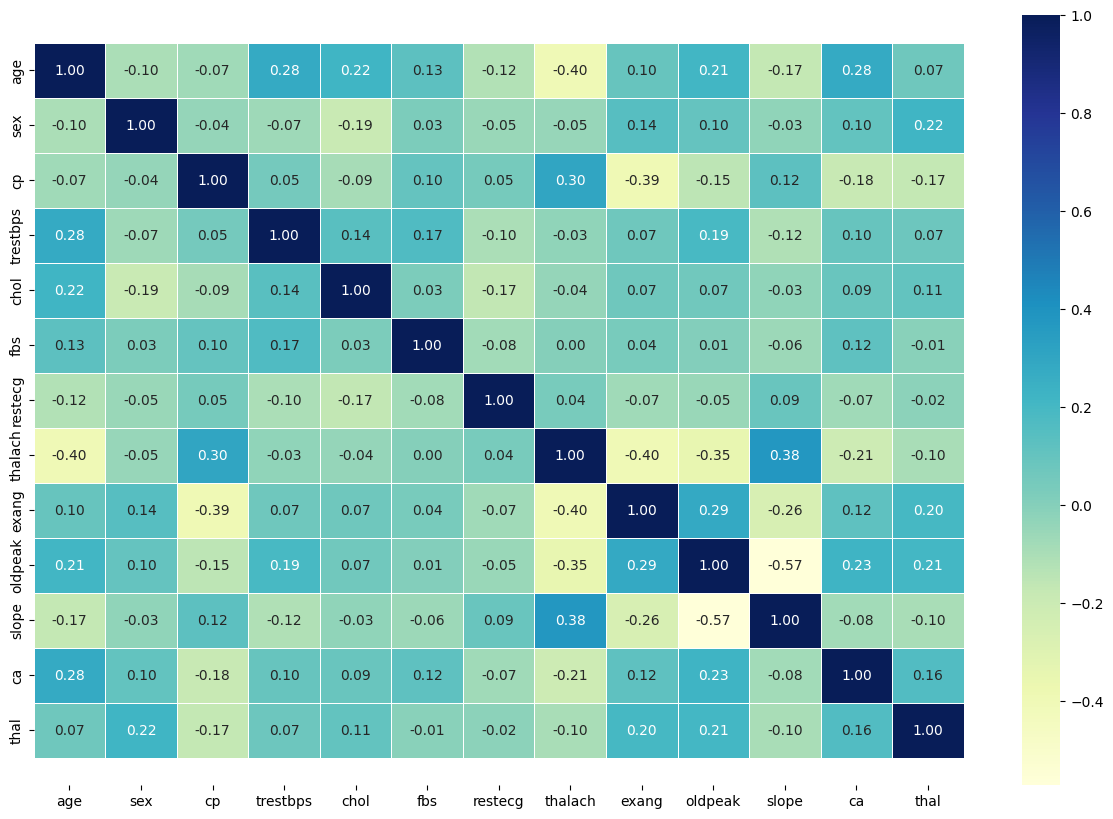

In [ ]:
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(15, 10))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidths=0.5,
                 fmt=".2f",
                 cmap="YlGnBu");
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

In [ ]:
X = df.drop("target", axis=1)
y = df["target"]
np.random.seed(42)

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [ ]:
# Logistic Regression
# K-Nearest Neighbours Classifier
# Random Forest Classifier

In [ ]:
models = {"Logistic Regression": LogisticRegression(),
          "KNN": KNeighborsClassifier(),
          "Random Forest": RandomForestClassifier()}



In [ ]:
df.shape

(293, 14)

In [ ]:
def fit_and_score(models, X_train, X_test, y_train, y_test):
    np.random.seed(42)
    model_scores = {}
    for name, model in models.items():
        model.fit(X_train, y_train)
        model_scores[name] = model.score(X_test, y_test)
    return model_scores

In [ ]:
model_scores = fit_and_score(models=models,
                             X_train=X_train,
                             X_test=X_test,
                             y_train=y_train,
                             y_test=y_test)

model_scores

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic Regression': 0.7966101694915254,
 'KNN': 0.6101694915254238,
 'Random Forest': 0.8305084745762712}

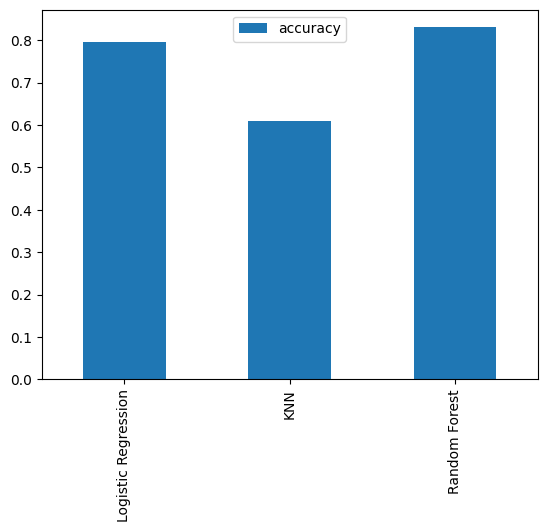

In [ ]:
model_compare = pd.DataFrame(model_scores, index=["accuracy"])
model_compare.T.plot.bar();

In [ ]:
clf = LogisticRegression(C=0.20433597178569418,
                         solver="liblinear")

clf.fit(X_train, y_train);
clf.coef_

array([[ 0.01065427, -0.6532493 ,  0.65690976, -0.01269301, -0.00121961,
        -0.00286653,  0.2462822 ,  0.02315276, -0.74256653, -0.55337231,
         0.34893074, -0.69190446, -0.57409585]])

In [ ]:
feature_dict = dict(zip(df.columns, list(clf.coef_[0])))
feature_dict

{'age': 0.010654269195803473,
 'sex': -0.6532493013231154,
 'cp': 0.6569097642975146,
 'trestbps': -0.012693010966724847,
 'chol': -0.0012196101388181162,
 'fbs': -0.0028665347931152284,
 'restecg': 0.24628220182898,
 'thalach': 0.023152756822695356,
 'exang': -0.7425665304327603,
 'oldpeak': -0.5533723084187018,
 'slope': 0.34893074164328064,
 'ca': -0.691904463719611,
 'thal': -0.574095854486517}

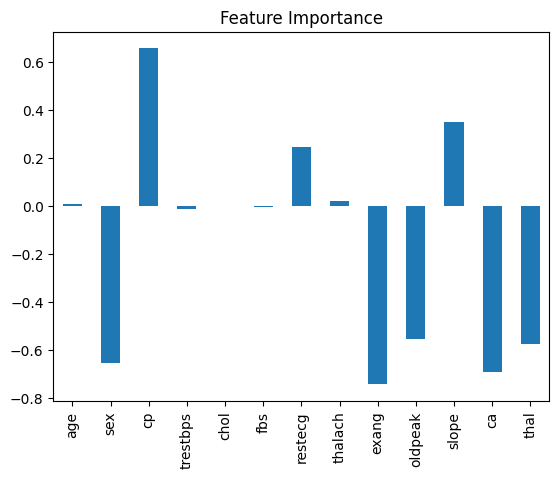

In [ ]:
feature_df = pd.DataFrame(feature_dict, index=[0])
feature_df.T.plot.bar(title="Feature Importance", legend=False);